In [2]:
#### Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_dmd =pd.read_excel("Desktop/717/Assignment/A3pjmdmd_bids.xlsx", 
                       sheet_name="hrl_dmd_bids",keep_default_na=False,header=0)
df_dmd.head(5)

,datetime_beginning_utc,Unnamed: 1,datetime_beginning_ept,area,hrly_da_demand_bid
0,1/1/2022 5:00:00 AM,,1/1/2022 12:00:00 AM,PJM_RTO,69967
1,1/1/2022 6:00:00 AM,,1/1/2022 1:00:00 AM,PJM_RTO,67228
2,1/1/2022 7:00:00 AM,,1/1/2022 2:00:00 AM,PJM_RTO,64830
3,1/1/2022 8:00:00 AM,,1/1/2022 3:00:00 AM,PJM_RTO,63771
4,1/1/2022 9:00:00 AM,,1/1/2022 4:00:00 AM,PJM_RTO,63761


In [7]:
df_dmd_pjm = df_dmd.loc[:,['datetime_beginning_ept', 'hrly_da_demand_bid']].copy()
df_dmd_pjm.columns=['time','demand(MW)']
df_dmd_pjm.head(5)

,time,demand(MW)
0,1/1/2022 12:00:00 AM,69967
1,1/1/2022 1:00:00 AM,67228
2,1/1/2022 2:00:00 AM,64830
3,1/1/2022 3:00:00 AM,63771
4,1/1/2022 4:00:00 AM,63761


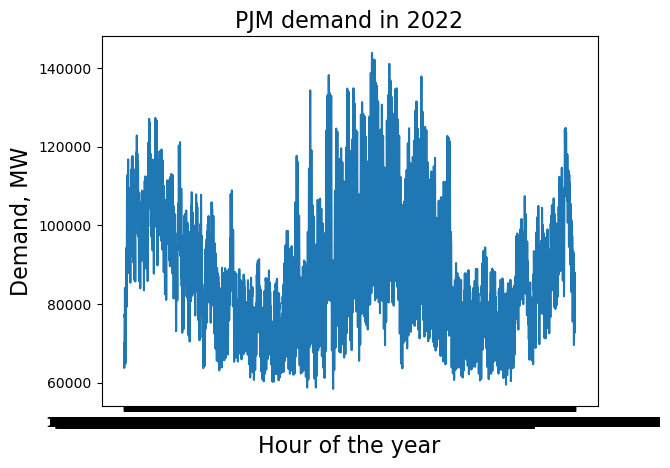

In [8]:
# Now we can plot the hour of the year on the x axis and the demand on the y axis
plt.plot(df_dmd_pjm['time'],df_dmd_pjm['demand(MW)'])
plt.xlabel('Hour of the year', fontsize=16)
plt.ylabel('Demand, MW', fontsize=16)
plt.title('PJM demand in 2022', fontsize=16)
plt.show()

In [9]:
df_dmd_pjm.dtypes

time          object
demand(MW)     int64
dtype: object

In [14]:
df_dmd_pjm["time"]=pd.to_datetime(df_dmd_pjm['time']) 
df_dmd_pjm.head(5) 

,time,demand(MW)
0,2022-01-01 00:00:00,69967
1,2022-01-01 01:00:00,67228
2,2022-01-01 02:00:00,64830
3,2022-01-01 03:00:00,63771
4,2022-01-01 04:00:00,63761


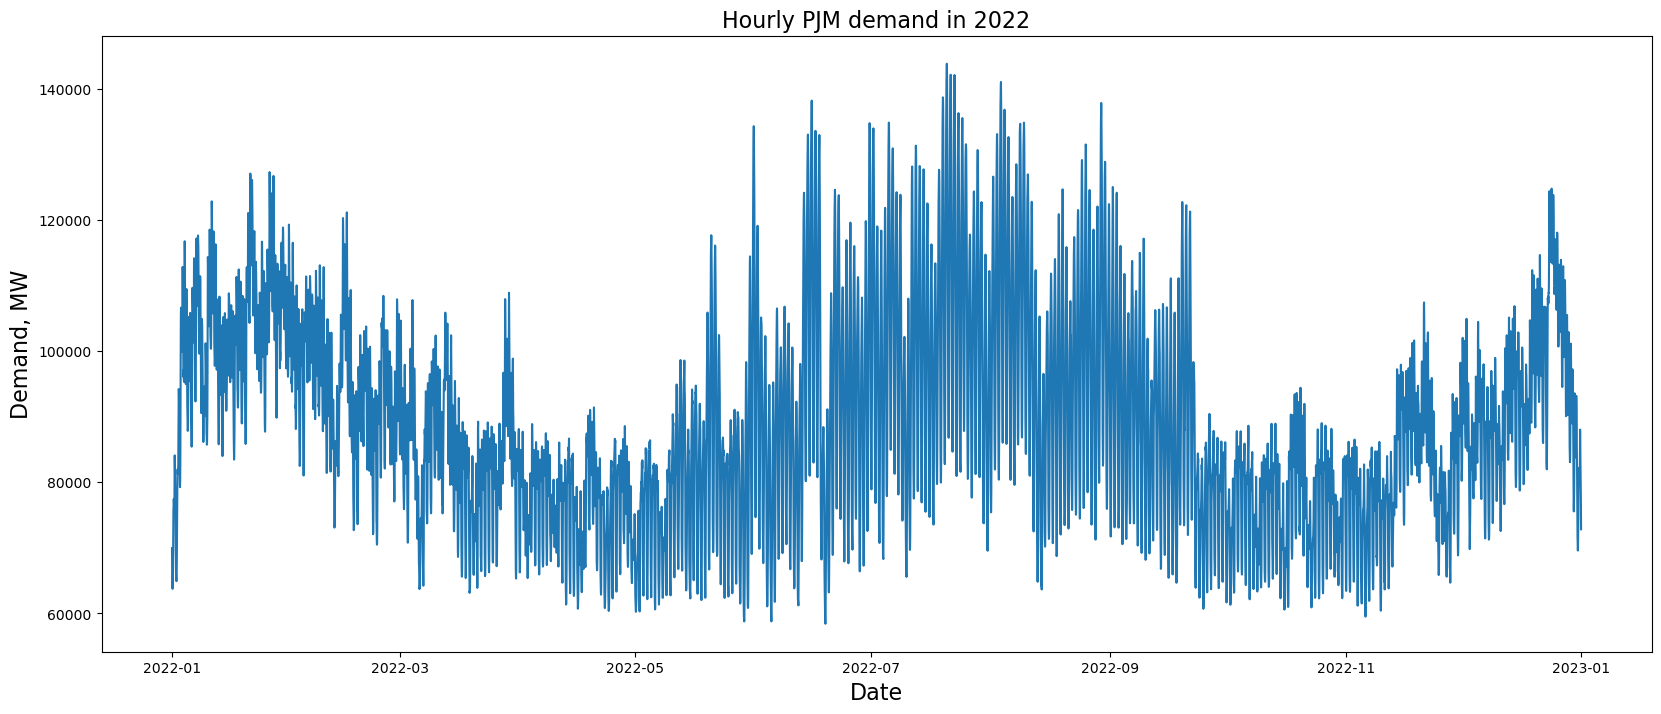

In [15]:
# We repeat the plot but this time we set the width and height to make it nicer
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(df_dmd_pjm['time'],df_dmd_pjm['demand(MW)'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Demand, MW', fontsize=16)
plt.title('Hourly PJM demand in 2022', fontsize=16)
plt.show()

In [21]:
df_dmdsort=df_dmd_pjm.sort_values(by='demand(MW)').copy()
df_dmdsort.head(10)

,time,demand(MW)
4061,2022-06-19 06:00:00,58430
4060,2022-06-19 05:00:00,58614
3556,2022-05-29 05:00:00,58777
3725,2022-06-05 06:00:00,58783
3557,2022-05-29 06:00:00,59071
4059,2022-06-19 04:00:00,59221
3555,2022-05-29 04:00:00,59230
3554,2022-05-29 03:00:00,59447
7419,2022-11-06 03:00:00,59516
3724,2022-06-05 05:00:00,59652


In [26]:
# 5% 10% 30% 50% 70% 90% 100%
#Use the demand data found in 2. to find the percentiles 1, 5, 10, 30, 50, 70, 90, 100 for total annual demand.
# Now lets look at the distribution of the demand by looking at some key percentiles
print('In 2022, 100% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],0)),'MW')
print('In 2022, 99% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],1)),'MW')
print('In 2022, 95% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],5)),'MW')
print('         90% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],10)),'MW')
print('         70% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],30)),'MW','or 30% of the hours has a demand lower than this')
print('         50% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],50)),'MW')
print('         30% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],70)),'MW')
print('         10% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],90)),'MW')
print('         5% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],95)),'MW')
print('         0% of the hours had a demand higher than{:,.2f}'.format(np.percentile(df_dmd_pjm['demand(MW)'],100)),'MW')

In 2022, 100% of the hours had a demand higher than58,430.00 MW
In 2022, 99% of the hours had a demand higher than62,102.22 MW
In 2022, 95% of the hours had a demand higher than65,632.85 MW
         90% of the hours had a demand higher than69,010.10 MW
         70% of the hours had a demand higher than79,286.10 MW or 30% of the hours has a demand lower than this
         50% of the hours had a demand higher than85,960.50 MW
         30% of the hours had a demand higher than96,233.80 MW
         10% of the hours had a demand higher than112,019.30 MW
         5% of the hours had a demand higher than120,092.60 MW
         0% of the hours had a demand higher than143,864.00 MW
